# Heart Disease Prediction using Naive Bayes Classifier

## 1. Data Processing

#### **Import Additional Library**

In [45]:
# Aditya Ghalib Hendryan (1806148630)

# Referensi Source Code:
# https://archive.ics.uci.edu/ml/datasets/Heart+Disease
# https://www.kaggle.com/zhaoyingzhu/heartcsv
# https://www.kaggle.com/ronitf/heart-disease-uci
# https://www.kaggle.com/cdabakoglu/heart-disease-classifications-machine-learning
# https://www.kaggle.com/jashsheth5/binary-classification-with-sklearn-and-keras-95
# https://github.com/MastersAbh/Heart-Disease-Prediction-using-Naive-Bayes-Classifier
# https://github.com/iKhushPatel/Heart-Disease-Prediction
# https://github.com/jash-05/Heart-Disease-Prediction-using-Machine-Learning

import numpy as np # linear algebra
import pandas as pd # data processing 
import matplotlib.pyplot as plt # ploting graphs
import seaborn as sns # ploting distribution graphs

# Models - Naive Bayes
from sklearn.naive_bayes import GaussianNB, BernoulliNB
from sklearn import model_selection
from sklearn.model_selection import train_test_split, cross_val_score

# Metrics Score
from sklearn.metrics import make_scorer, accuracy_score, precision_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Hyperparameter Tuning Tools
from sklearn.model_selection import GridSearchCV

import warnings
warnings.filterwarnings('ignore')

#### **Load/Importing Dataset**

In [46]:
df = pd.read_csv('heart.csv')

#### **Display Dataset (First Row Dataset and Last Low Dataset)**

In [47]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [48]:
df.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0
302,57,0,1,130,236,0,0,174,0,0.0,1,1,2,0


#### **Count Column and Row from Dataset**

In [49]:
df.shape

(303, 14)

#### **Basic Data Statistic from Dataset**

In [50]:
df.describe(include='all')

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


#### **General Information of Dataset**

In [51]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
age         303 non-null int64
sex         303 non-null int64
cp          303 non-null int64
trestbps    303 non-null int64
chol        303 non-null int64
fbs         303 non-null int64
restecg     303 non-null int64
thalach     303 non-null int64
exang       303 non-null int64
oldpeak     303 non-null float64
slope       303 non-null int64
ca          303 non-null int64
thal        303 non-null int64
target      303 non-null int64
dtypes: float64(1), int64(13)
memory usage: 33.2 KB


#### **Check and Identification Missing Value**

In [52]:
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

## 2. Data Visualization

#### **Age, Trestbps, Chol, Thalach, and Oldpeak Distribution**

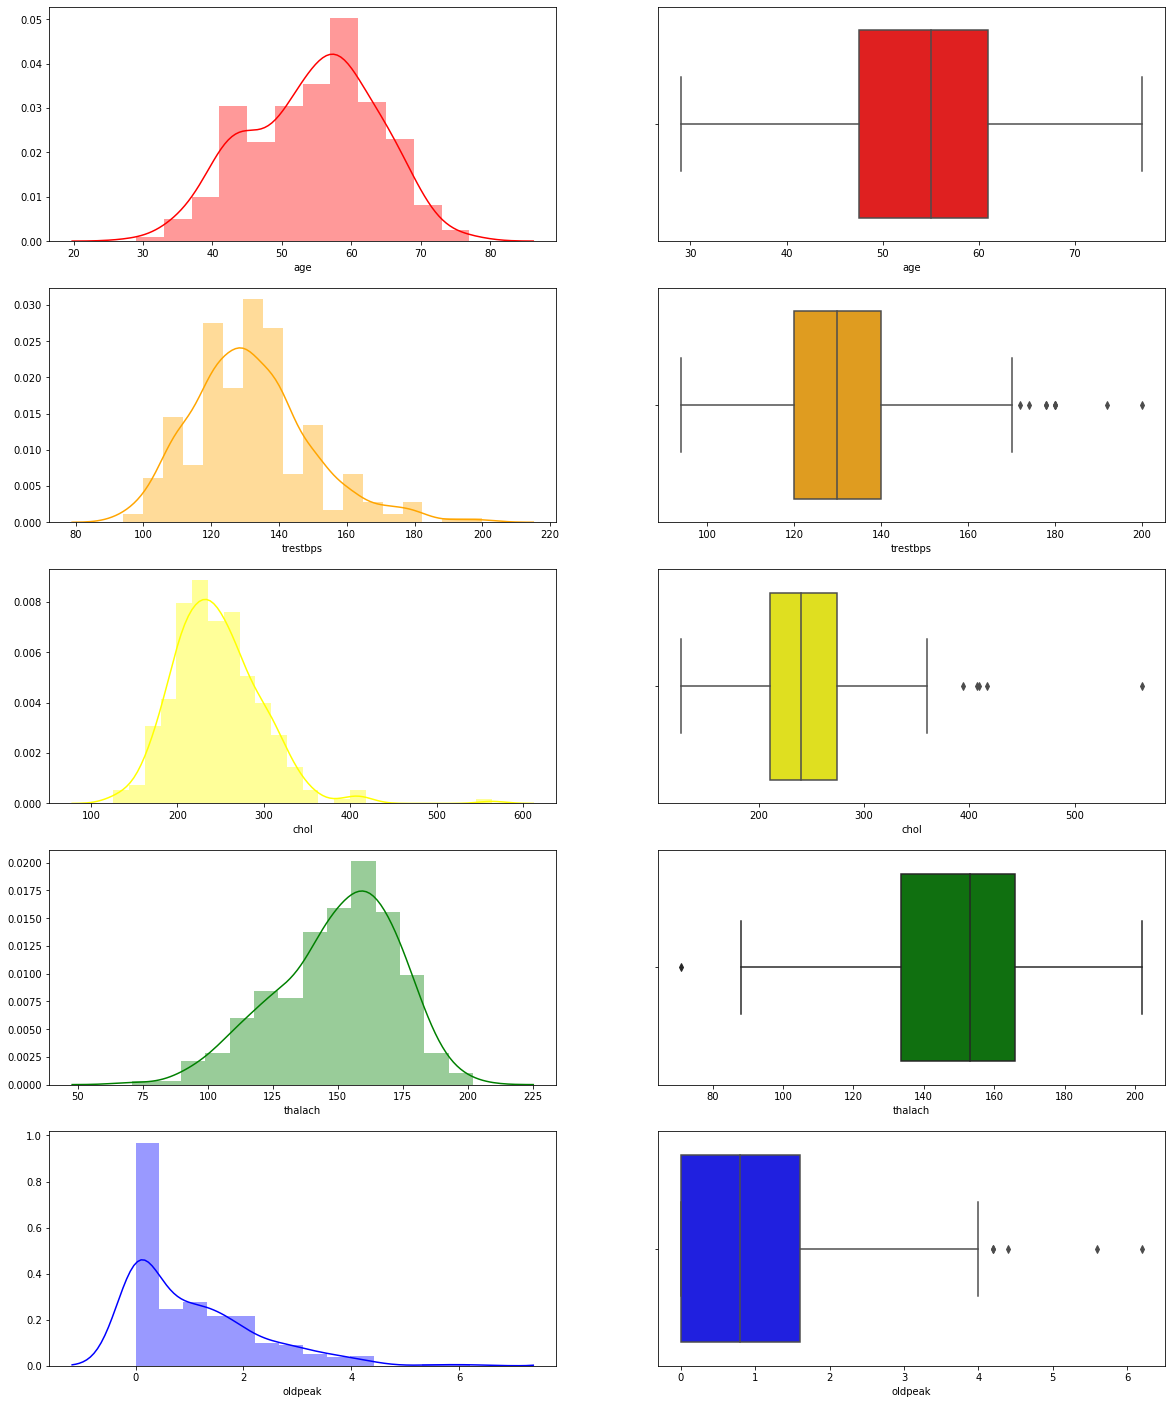

In [53]:
plt.figure(figsize=(20,25))

# Age      : Age in years
plt.subplot(5,2,1)
sns.distplot(df['age'], color='red')
plt.subplot(5,2,2)
sns.boxplot(df['age'], color='red')

# Trestbps : Resting Blood Pressure (in mm Hg on admission to the hospital)
plt.subplot(5,2,3)
sns.distplot(df['trestbps'], color='orange')
plt.subplot(5,2,4)
sns.boxplot(df['trestbps'], color='orange')

# Chol     : Serum Cholestoral in mg/dl
plt.subplot(5,2,5)
sns.distplot(df['chol'], color='yellow')
plt.subplot(5,2,6)
sns.boxplot(df['chol'], color='yellow')

# Thalach  : Maximum Heart Rate achieved
plt.subplot(5,2,7)
sns.distplot(df['thalach'], color='green')
plt.subplot(5,2,8)
sns.boxplot(df['thalach'], color='green')

# Oldpeak  : ST depression induced by exercise relative to rest
plt.subplot(5,2,9)
sns.distplot(df['oldpeak'], color='blue')
plt.subplot(5,2,10)
sns.boxplot(df['oldpeak'], color='blue')

#### **Sex, CP, FBS, Restecg, Exang, Slope, CA, Thal, and Target Distribution**

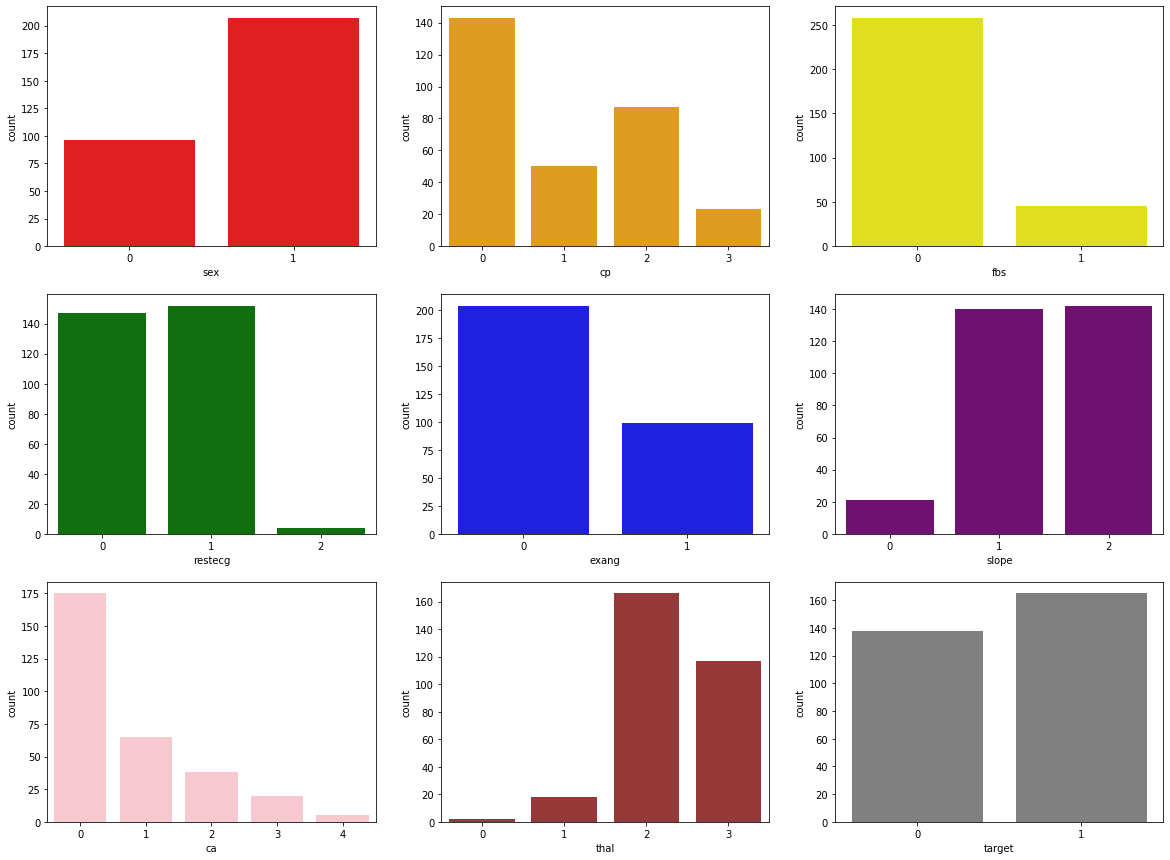

In [54]:
plt.figure(figsize=(20,15))

# Sex : Gender (1 = male; 0 = female)
plt.subplot(3,3,1)
sns.countplot(df['sex'], color='red')

# CP  : Chest Pain type (0 = typical angina; 1 = atypical angina; 2 = non-anginal pain; 3 = asymptomatic)
plt.subplot(3,3,2)
sns.countplot(df['cp'], color='orange')

# FBS : Fasting Blood Sugar > 120 mg/dl (1 = true; 0 = false)
plt.subplot(3,3,3)
sns.countplot(df['fbs'], color='yellow')

# Restecg : Resting Electrocardiographic results (0 = normal; 1 = having ST-T wave abnormality; 2 = showing probable or definite left ventricular hypertrophy by Estes' criteria)
plt.subplot(3,3,4)
sns.countplot(df['restecg'], color='green')

# Exang   : Exercise induced angina (1 = yes; 0 = no)
plt.subplot(3,3,5)
sns.countplot(df['exang'], color='blue')

# Slope   : The slope of the peak exercise ST segment (0 = upsloping; 1 = flat; 2 = downsloping)
plt.subplot(3,3,6)
sns.countplot(df['slope'], color='purple')

# CA      : Number of major vessels (0-4) colored by flourosopy
plt.subplot(3,3,7)
sns.countplot(df['ca'], color='pink')

# Thal    : Defect condition/status (0-4)
plt.subplot(3,3,8)
sns.countplot(df['thal'], color='brown')

# Target  : Diagnosis of heart disease (angiographic disease status) (0 = < 50% diameter narrowing; 1 = > 50% diameter narrowing)
plt.subplot(3,3,9)
sns.countplot(df['target'], color='gray')

#### **Data Correlation between feature/attributes**

In [55]:
df.corr().style.background_gradient().set_precision(2)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1,-0.098,-0.069,0.28,0.21,0.12,-0.12,-0.4,0.097,0.21,-0.17,0.28,0.068,-0.23
sex,-0.098,1,-0.049,-0.057,-0.2,0.045,-0.058,-0.044,0.14,0.096,-0.031,0.12,0.21,-0.28
cp,-0.069,-0.049,1,0.048,-0.077,0.094,0.044,0.3,-0.39,-0.15,0.12,-0.18,-0.16,0.43
trestbps,0.28,-0.057,0.048,1,0.12,0.18,-0.11,-0.047,0.068,0.19,-0.12,0.1,0.062,-0.14
chol,0.21,-0.2,-0.077,0.12,1,0.013,-0.15,-0.0099,0.067,0.054,-0.004,0.071,0.099,-0.085
fbs,0.12,0.045,0.094,0.18,0.013,1,-0.084,-0.0086,0.026,0.0057,-0.06,0.14,-0.032,-0.028
restecg,-0.12,-0.058,0.044,-0.11,-0.15,-0.084,1,0.044,-0.071,-0.059,0.093,-0.072,-0.012,0.14
thalach,-0.4,-0.044,0.3,-0.047,-0.0099,-0.0086,0.044,1,-0.38,-0.34,0.39,-0.21,-0.096,0.42
exang,0.097,0.14,-0.39,0.068,0.067,0.026,-0.071,-0.38,1,0.29,-0.26,0.12,0.21,-0.44
oldpeak,0.21,0.096,-0.15,0.19,0.054,0.0057,-0.059,-0.34,0.29,1,-0.58,0.22,0.21,-0.43


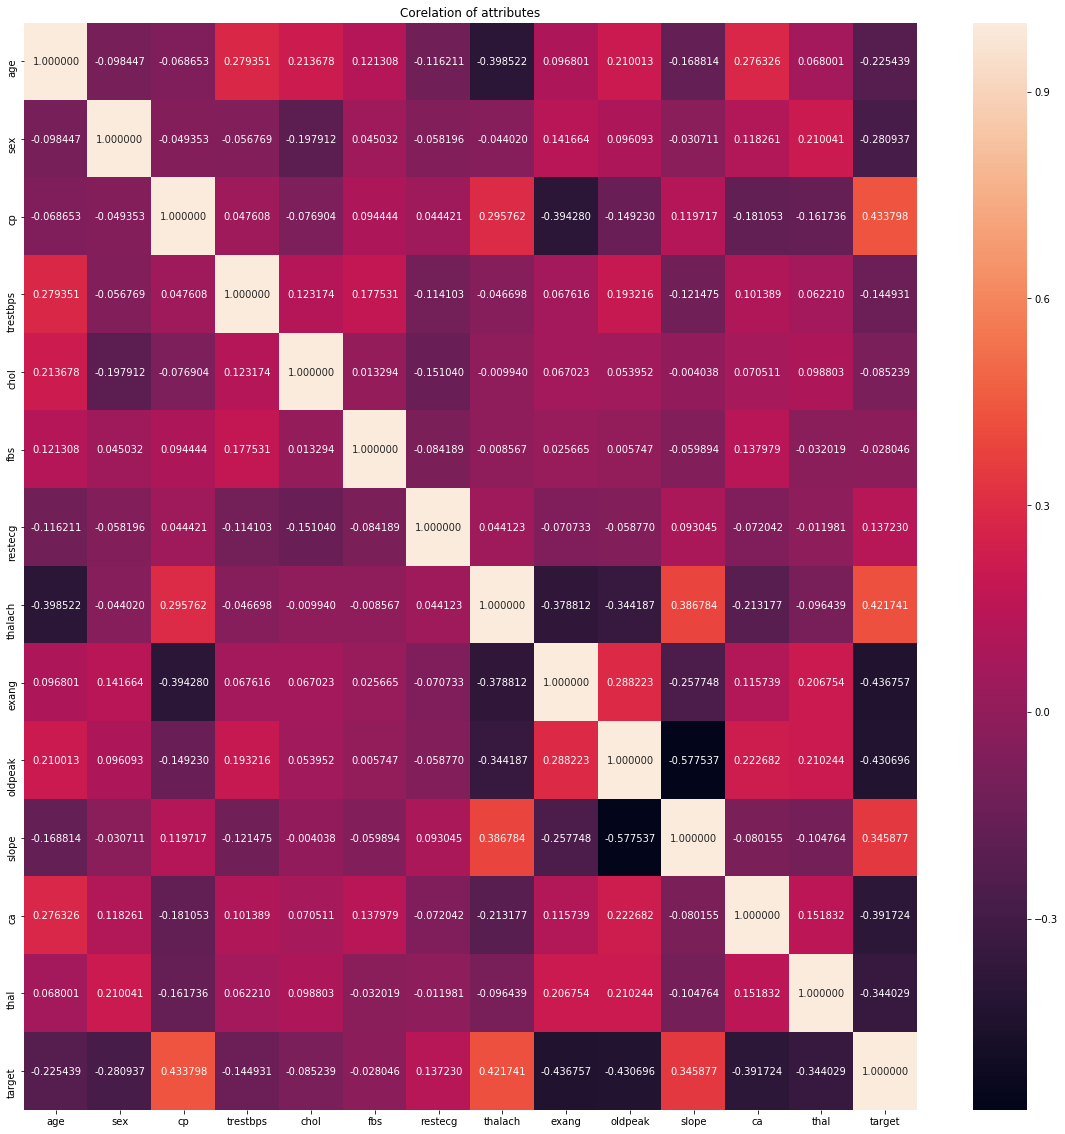

In [56]:
plt.subplots(figsize = (20,20))
sns.heatmap(df.corr(),annot=True,fmt="f").set_title("Corelation of attributes")
plt.show()

## 3. Machine Learning Model and Accuracy (NAIVE BAYES)

#### **Splitting Dataset into Training and Testing (Ratio 80:20)**

In [57]:
x = df.drop(columns=['target'])
y = df['target']
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0, stratify=y)

#### **Algorithm and Accuracy**

In [58]:
nb = BernoulliNB()
nb.fit(X_train, y_train)
Y_pred = nb.predict(X_test) 

print(classification_report(y_test, Y_pred))

accuracy_nb=round(accuracy_score(y_test,Y_pred)* 100, 2)
acc_gaussian = round(nb.score(X_train, y_train) * 100, 2)
accuracy = accuracy_score(y_test,Y_pred)
precision =precision_score(y_test, Y_pred,average='micro')
recall =  recall_score(y_test, Y_pred,average='micro')
f1 = f1_score(y_test,Y_pred,average='micro')
roc = roc_auc_score(y_test, Y_pred)

print('accuracy_Naive Bayes: %.3f' %accuracy)
print('precision_Naive Bayes: %.3f' %precision)
print('recall_Naive Bayes: %.3f' %recall)
print('f1-score_Naive Bayes : %.3f' %f1)
print('roc-auc-score_Naive Bayes : %.3f' %roc)


print("\nThe accuracy score achieved using Naive Bayes is: "+str(accuracy_nb)+" %")

              precision    recall  f1-score   support

           0       0.82      0.82      0.82        28
           1       0.85      0.85      0.85        33

    accuracy                           0.84        61
   macro avg       0.83      0.83      0.83        61
weighted avg       0.84      0.84      0.84        61

accuracy_Naive Bayes: 0.836
precision_Naive Bayes: 0.836
recall_Naive Bayes: 0.836
f1-score_Naive Bayes : 0.836
roc-auc-score_Naive Bayes : 0.835

The accuracy score achieved using Naive Bayes is: 83.61 %


#### **Hyperparameters Tuning**

In [66]:
#Melakukan list Hyperparameters yang akan diuji
var_smoothing = [1e-1, 1e-2, 1e-3, 1e-4, 1e-5, 1e-6, 1e-7, 1e-8, 1e-9] # Default = 1e-9
alpha = [0.5] # Default = 1.0
binarize = [0.5] # Default = 0.0
fit_prior = [False] # Default True

hyperparameters = {'var_smoothing':var_smoothing}
hyperparameters2 = {'alpha':alpha, 'binarize':binarize, 'fit_prior':fit_prior}

nb_2 = BernoulliNB()

# Cross Validation (50:50 Traning and Testing Dataset)
clf = GridSearchCV(nb_2, hyperparameters2, cv=10)

best_model = clf.fit(x,y)

# print('Best var_smoothing:', best_model.best_estimator_.get_params()['var_smoothing'])
print(clf.best_score_)
print(clf.best_estimator_)

0.8052805280528053
BernoulliNB(alpha=0.5, binarize=0.5, class_prior=None, fit_prior=False)


#### **Repeat Algorithm and Accuracy Process after Hyperparameter Tuning**

In [67]:
Y_pred = best_model.predict(X_test)

print(classification_report(y_test, Y_pred))

accuracy_nb=round(accuracy_score(y_test,Y_pred)* 100, 2)
accuracy = accuracy_score(y_test,Y_pred)
precision =precision_score(y_test, Y_pred,average='micro')
recall =  recall_score(y_test, Y_pred,average='micro')
f1 = f1_score(y_test,Y_pred,average='micro')
roc = roc_auc_score(y_test, Y_pred)

print('accuracy_Naive Bayes: %.3f' %accuracy)
print('recall_Naive Bayes: %.3f' %recall)
print('f1-score_Naive Bayes : %.3f' %f1)
print('roc-auc-score_Naive Bayes : %.3f' %roc)

print("\nThe accuracy score achieved using Naive Bayes with Hyperparameter Tuning is: "+str(accuracy_nb)+" %")

              precision    recall  f1-score   support

           0       0.77      0.82      0.79        28
           1       0.84      0.79      0.81        33

    accuracy                           0.80        61
   macro avg       0.80      0.80      0.80        61
weighted avg       0.81      0.80      0.80        61

accuracy_Naive Bayes: 0.803
recall_Naive Bayes: 0.803
f1-score_Naive Bayes : 0.803
roc-auc-score_Naive Bayes : 0.805

The accuracy score achieved using Naive Bayes with Hyperparameter Tuning is: 80.33 %
